# Causal Inference in Airline Passenger Satisfaction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Airline passenger satisfaction plays a crucial role in the success of airline companies. Understanding the factors that contribute to passenger satisfaction is essential for airlines to improve their services, retain customers, and gain a competitive edge in the industry. However, identifying causal relationships between various factors and passenger satisfaction can be challenging due to the presence of confounding variables and potential biases in observational data.

Causal inference provides a powerful framework to overcome these challenges and gain insights into the causal relationships between variables. In this Jupyter notebook, we will explore the application of causal inference techniques to analyze airline passenger satisfaction.

The primary goal of this notebook is to demonstrate how causal inference can be employed to answer questions such as:

- What are the causal effects of specific factors, such as flight delays, in-flight amenities, or customer service, on passenger satisfaction?
- How do different factors interact with each other in influencing passenger satisfaction?
- Are there any confounding variables that might affect the relationship between certain factors and passenger satisfaction?

In [2]:
df = pd.read_csv("airlines.csv")

In [3]:
# Turning satisfaction into a binary variable
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == "satisfied" else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == "Male" else 0)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Causal inference exploration

There are many factors that contribute to passenger satisfaction, including in-flight amenities, comfort, and timeliness. While some of these factors, such as flight delays, can be beyond the control of the airline, others, such as on-board service, can be fully managed by the airline. Providing friendly, efficient, and helpful on-board service can greatly impact a passenger's overall satisfaction with their flight experience and help establish a positive relationship with the airline.

In this causal inference analysis, it will be determined how on-board service may cause the overall satisfaction of the passenger.


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int64  
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Y variable

When passengers have a positive experience with an airline and are satisfied with their service, they are more likely to choose the same airline for their future travel needs and recommend it to others. This can lead to increased repeat business and a positive reputation for the airline, helping to establish a strong customer base and enhance overall success.

Let's check how the satisfaction (target) and loyalty are distributed in the dataset.

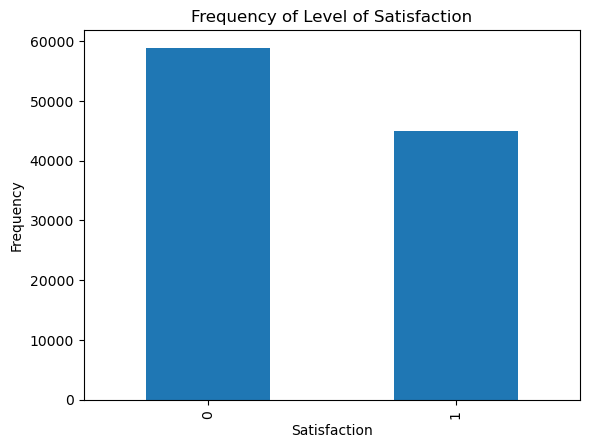

0    58879
1    45025
Name: satisfaction, dtype: int64


In [6]:
# plot the frequency of values
df['satisfaction'].value_counts().plot(kind='bar')

# add title and labels
plt.title('Frequency of Level of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')

# show plot
plt.show()
print(df['satisfaction'].value_counts())

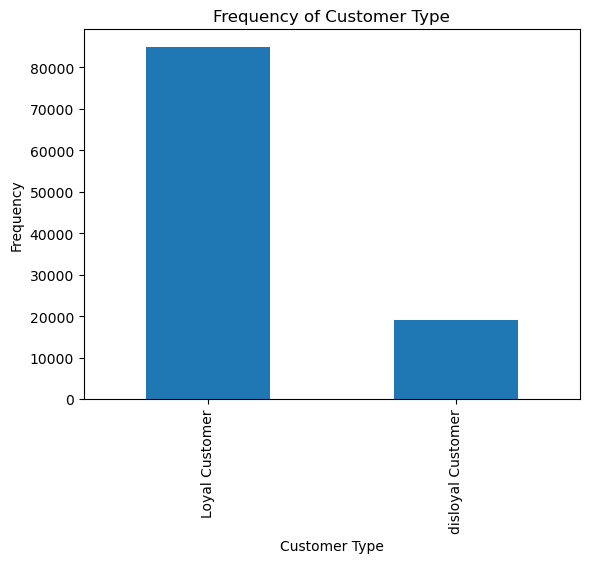

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64


In [7]:
# plot the frequency of Column_A values
df['Customer Type'].value_counts().plot(kind='bar')

# add title and labels
plt.title('Frequency of Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')

# show plot
plt.show()
print(df['Customer Type'].value_counts())

Around 80& are Loyal customers in this dataset!

### Distribution of numerical

In [8]:
loyal = df[df['Customer Type']=="Loyal Customer"]
nloyal = df[df['Customer Type']!="Loyal Customer"]

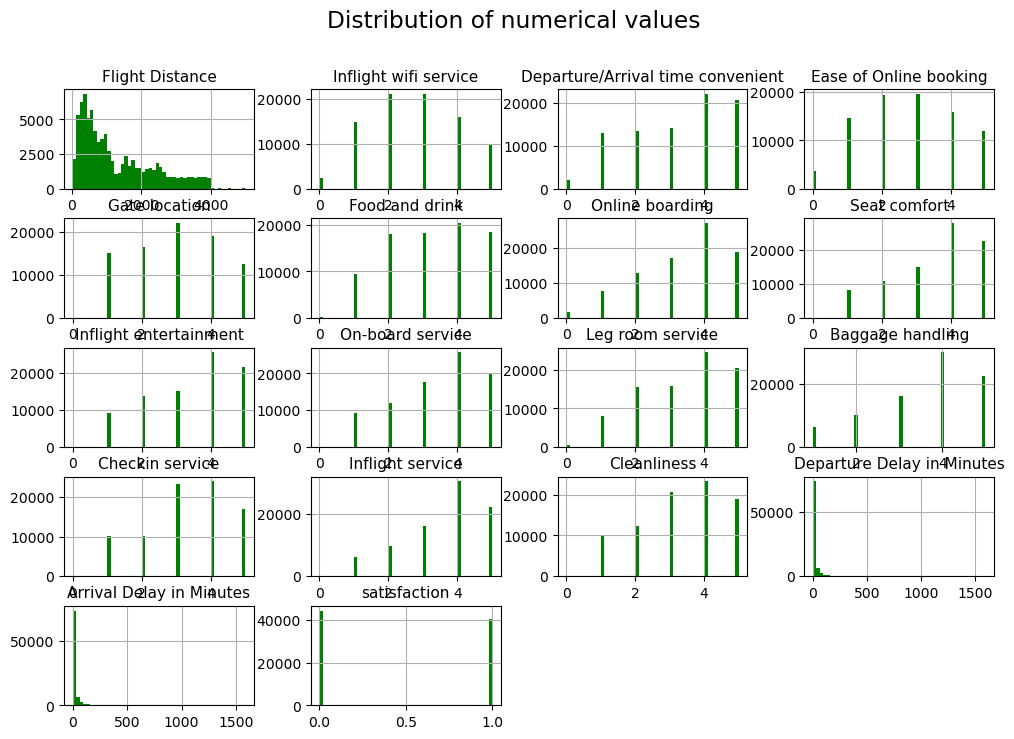

In [9]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=10, titlesize=11)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


loyal[['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction']].hist(bins=50, figsize=(12, 8), color="green")
plt.suptitle("Distribution of numerical values")
plt.show()

### Analysis of confounded variables

Confounders are variables that are associated with both the treatment and the outcome, and they can bias the estimate of the treatment effect if they are not controlled for. By including these variables in X, the model can control for the effect of confounders and estimate the treatment effect more accurately.

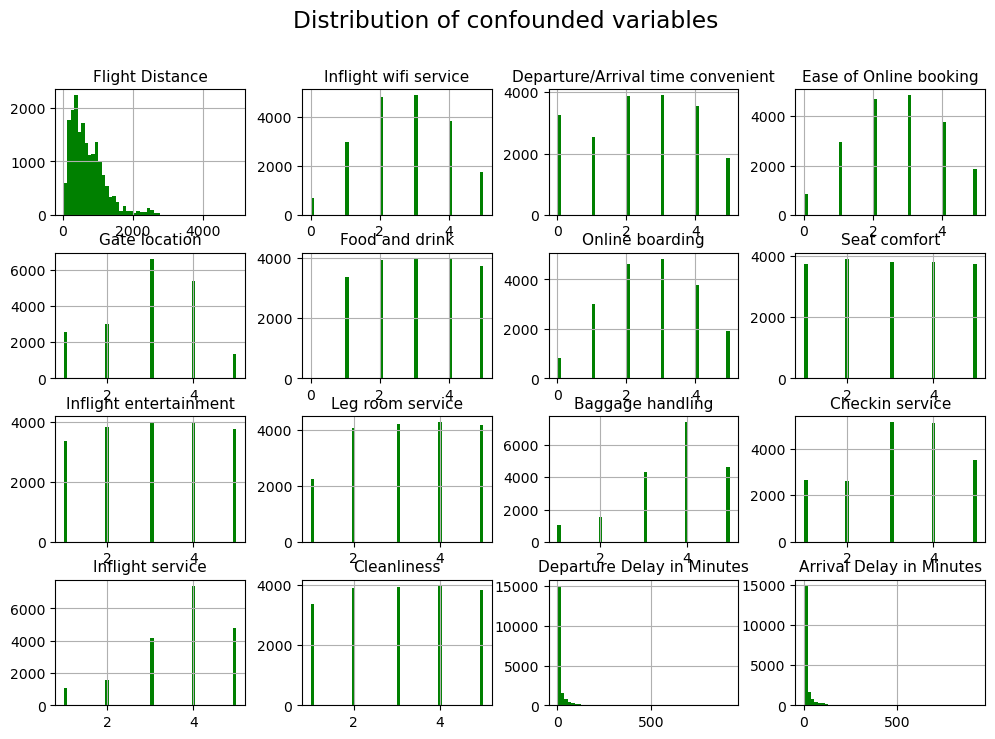

In [10]:
nloyal[['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].hist(bins=50, figsize=(12, 8), color="green")
plt.suptitle("Distribution of confounded variables")
plt.show()

### Treatment

In causal inference, the control group is the group of individuals or units that did not receive the treatment being studied. The treatment group is the group of individuals or units that did receive the treatment.

In this case we handle treatment as being satisfied with the on-board service. For this analysis, satisfaction will be taken as a score of 4 or more.

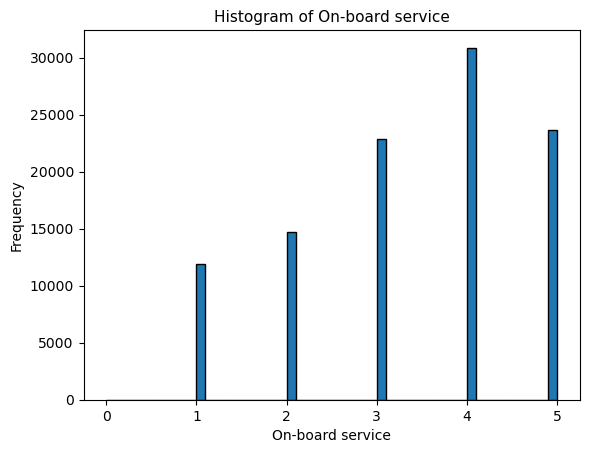

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['On-board service'], bins=50, edgecolor='k')
plt.xlabel('On-board service')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'On-board service')
plt.show()


A transformation of control group into binary variable will be performed as it will be used to identify which units are in the control group, and to estimate the average treatment effect (ATE) for the treatment group compared to the control group.

In [12]:

df['On-board service'] = df['On-board service'].apply(lambda x: 1 if x >=4 else 0)

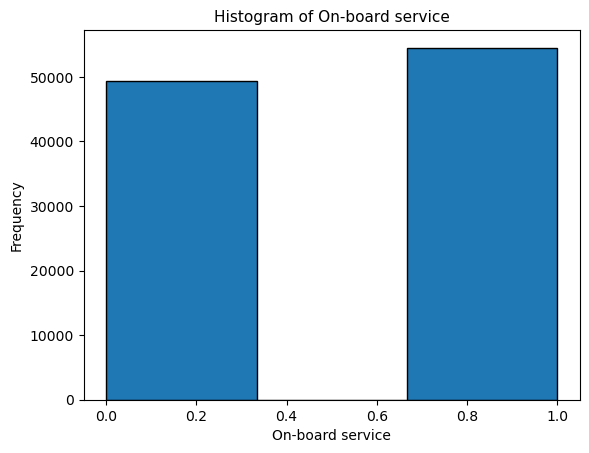

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['On-board service'], bins=3, edgecolor='k')
plt.xlabel('On-board service')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'On-board service')
plt.show()


### Correlation matrix 

In [14]:
corr_matrix = df.corr()
corr_matrix['On-board service'].sort_values(ascending=False)

On-board service                     1.000000
Inflight service                     0.454517
Baggage handling                     0.431375
Inflight entertainment               0.367503
satisfaction                         0.316570
Leg room service                     0.315086
Checkin service                      0.205311
Online boarding                      0.154758
Seat comfort                         0.133644
Cleanliness                          0.118202
Flight Distance                      0.111371
Inflight wifi service                0.106624
Age                                  0.073164
Food and drink                       0.051197
Departure/Arrival time convenient    0.046478
id                                   0.045923
Ease of Online booking               0.038154
Gender                               0.007329
Unnamed: 0                           0.000950
Gate location                       -0.018218
Departure Delay in Minutes          -0.035428
Arrival Delay in Minutes          

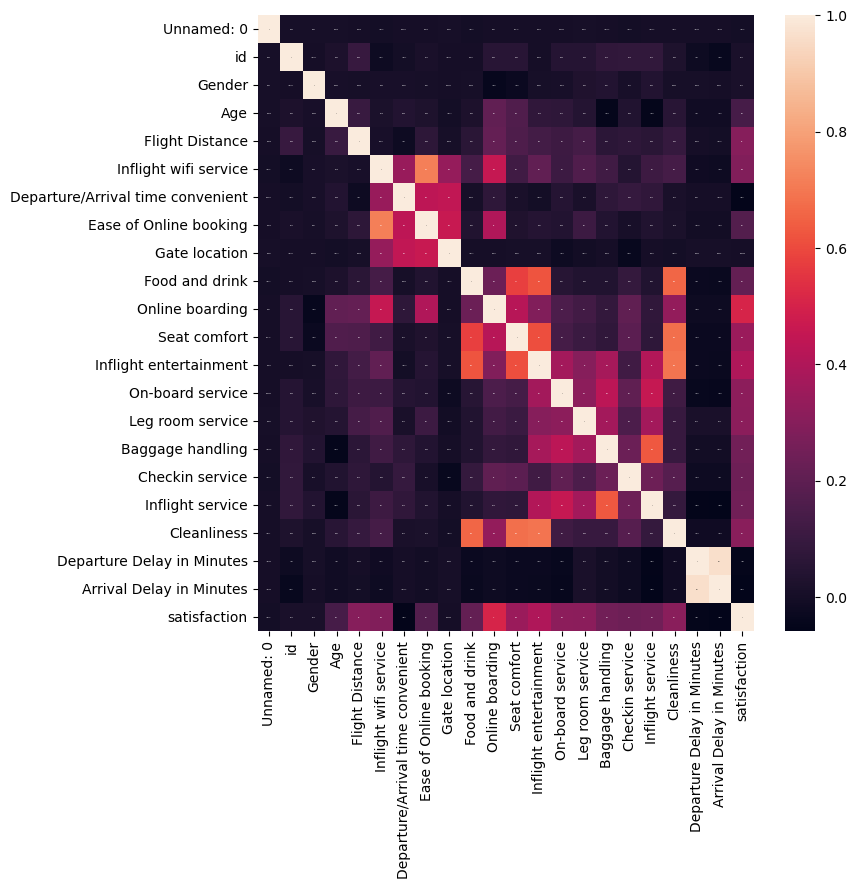

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True,annot_kws={"size":.5})
plt.show()

### Cleaning Data

Null values, also known as missing data, can have a significant impact on the validity of causal estimates. When null values are present in the data, they can create bias in the results and lead to inaccurate conclusions about the relationship between the variables being studied. 

There are only 310 null values and they are all in Arrival Delay in Minutes, it represents 0.3%, so remove

In [16]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [17]:
df = df.dropna()

### Treating categorical values

One hot encoding is a technique that is used to convert categorical values into numerical values by creating new binary columns for each category, with each column indicating the presence or absence of a particular category in the data. 

For the categorical values in our dataset, we will use the function get dummies from pandas to convert them into numerical values.

In [18]:
df = df.join(pd.get_dummies(df[['Customer Type', 'Type of Travel', 'Class']]))
df.drop(columns = ['Customer Type', 'Type of Travel', 'Class'], inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  int64  
 3   Age                                103594 non-null  int64  
 4   Flight Distance                    103594 non-null  int64  
 5   Inflight wifi service              103594 non-null  int64  
 6   Departure/Arrival time convenient  103594 non-null  int64  
 7   Ease of Online booking             103594 non-null  int64  
 8   Gate location                      103594 non-null  int64  
 9   Food and drink                     103594 non-null  int64  
 10  Online boarding                    103594 non-null  int64  
 11  Seat comfort                       1035

### Creating Causal Model 

In [20]:
#from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
#from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
#from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
#from causalml.propensity import ElasticNetPropensityModel
#from sklearn.impute import SimpleImputer

In [23]:
feature_names= ['Gender', 'Age', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
        'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes','Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus']
X = df[feature_names]
y = df['satisfaction']
treatment = df['On-board service']


### LRS and XGBT Regressor to estimate ATE

If the ATE is positive, this indicates that, on average, the treatment group experiences a better outcome than the control group. If the ATE is negative, this indicates that, on average, the treatment group experiences a worse outcome than the control group.

Using LRS and XGBT Regressor the ATE is positive, therefore it indicates that on average the on-board service do increases the satisfaction of the customer.

In [24]:
# Computing the Average Treatment Effect (ATE)

lr = LRSRegressor()
te, lb, ub = lr.estimate_ate(X, treatment, y)
print('Average Treatment Effect (Linear Regression): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))


Average Treatment Effect (Linear Regression): 0.09 (0.08, 0.09)


In [25]:
# Computing the Average Treatment Effect (ATE)

xg = XGBTRegressor(random_state=5)
te, lb, ub = xg.estimate_ate(X, treatment, y)
print('Average Treatment Effect (XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Average Treatment Effect (XGBoost): 0.01 (0.01, 0.01)


In [26]:
# Computing the Individual Treatment Effect
CATE_T = xg.fit_predict(X, treatment,y)

In [27]:
# Creating a copy of the original dataframe to join the ITE values 
df2 = df.copy()

In [28]:
# Joining the ITE values with the original dataframe
df2['CATE'] = CATE_T

In [29]:
df2.head()

,Unnamed: 0,id,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Arrival Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,CATE
0,0,70172,1,13,460,3,4,3,1,5,...,18.0,0,1,0,0,1,0,0,1,0.033075
1,1,5047,1,25,235,3,2,3,3,1,...,6.0,0,0,1,1,0,1,0,0,-0.105403
2,2,110028,0,26,1142,2,2,2,2,5,...,0.0,1,1,0,1,0,1,0,0,0.003076
3,3,24026,0,25,562,2,5,5,5,2,...,9.0,0,1,0,1,0,1,0,0,-0.019501
4,4,119299,1,61,214,3,3,3,3,4,...,0.0,1,1,0,1,0,1,0,0,-0.169843


### Visualizing Results

#### Feature importance with LGBM Regressor

In both Permutation and LGBM Methods of feature importance, online boarding is assessed as a high relative importance feature. A variable with a high relative importance in causal inference is considered to have a large effect on the outcome, while a variable with low relative importance has a small effect.

Both methods provide a way to assess the relative importance of features in a machine learning model, but they may give different results, as they use different algorithms to compute feature importances. As one can see, there is a significant difference in the feature of checkin service where LGBM positions as the second most important variable and Permutation methods is the 7th most important.

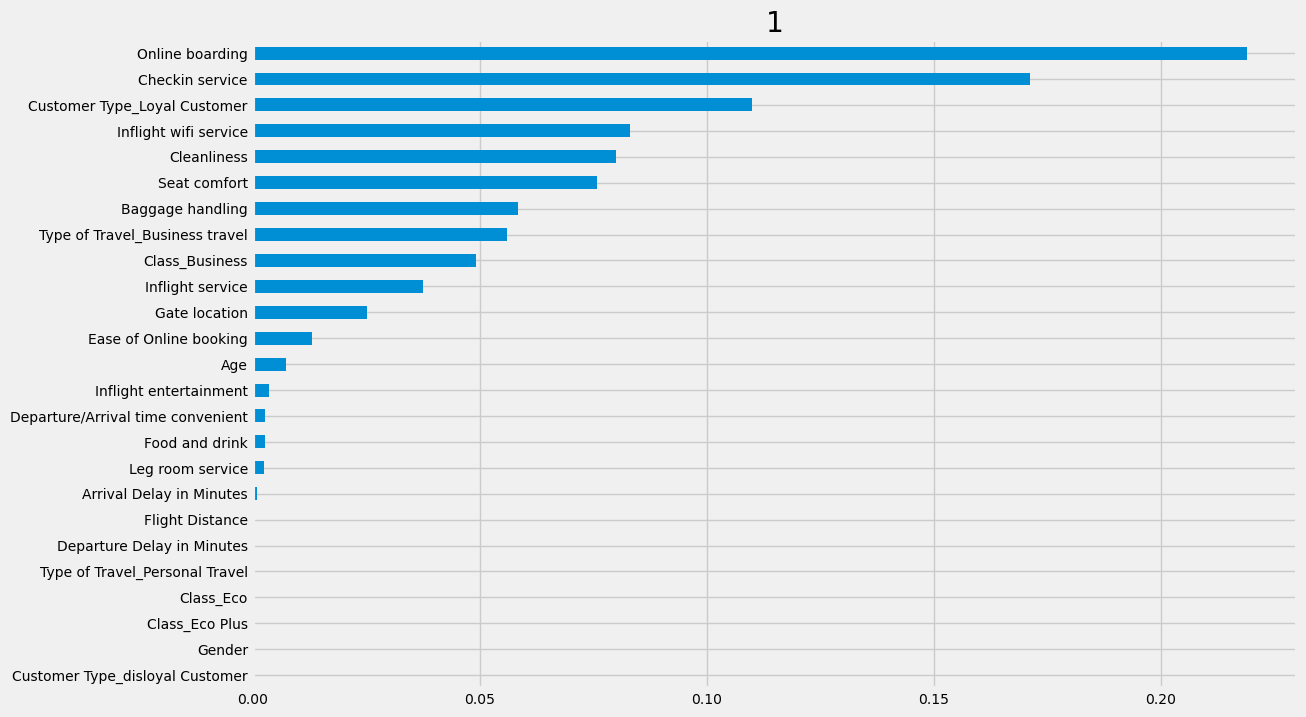

In [30]:
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.dataset.regression import synthetic_data
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

slearner = BaseSRegressor(LGBMRegressor(), control_name=0)
slearner.estimate_ate(X, treatment, y)
slearner_tau = slearner.fit_predict(X, treatment, y)

model_tau_feature = RandomForestRegressor()  # specify model for model_tau_feature

slearner.get_importance(X=X, tau=slearner_tau, model_tau_feature=model_tau_feature,
                        normalize=True, method='auto', features=feature_names)

# Using the feature_importances_ method in the base learner (LGBMRegressor() in this example)
slearner.plot_importance(X=X, tau=slearner_tau, normalize=True, method='auto',features=feature_names)


#### Feature importance with PermutationImportance Method

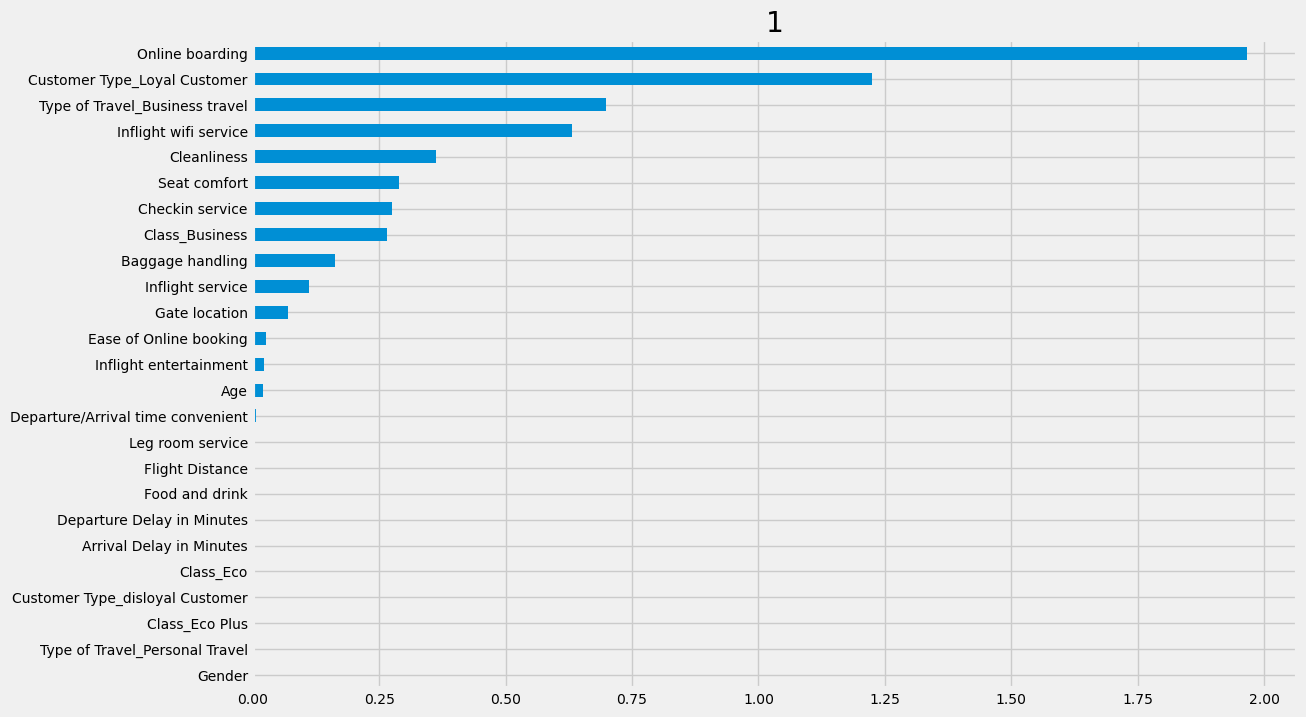

In [31]:
# Using eli5's PermutationImportance
slearner.plot_importance(X=X, tau=slearner_tau, normalize=True, method='permutation',features=feature_names)


#### SHAP Values

In the plot below, each feature is represented by a vertical bar that represents the contribution of that feature to the prediction. The length of the bar indicates the magnitude of the contribution, and the color indicates the direction of the contribution. Positive contributions are shown in blue, while negative contributions are shown in red.

As features with longer bars have a larger contribution to the prediction, one can note that also the plot with SHAP values show that online boarding is the most important feature. Furtheremore, other features with large contribution are loyal customers and business travel, and given the nature of those features it was expected to have a contribution to satisfaction.

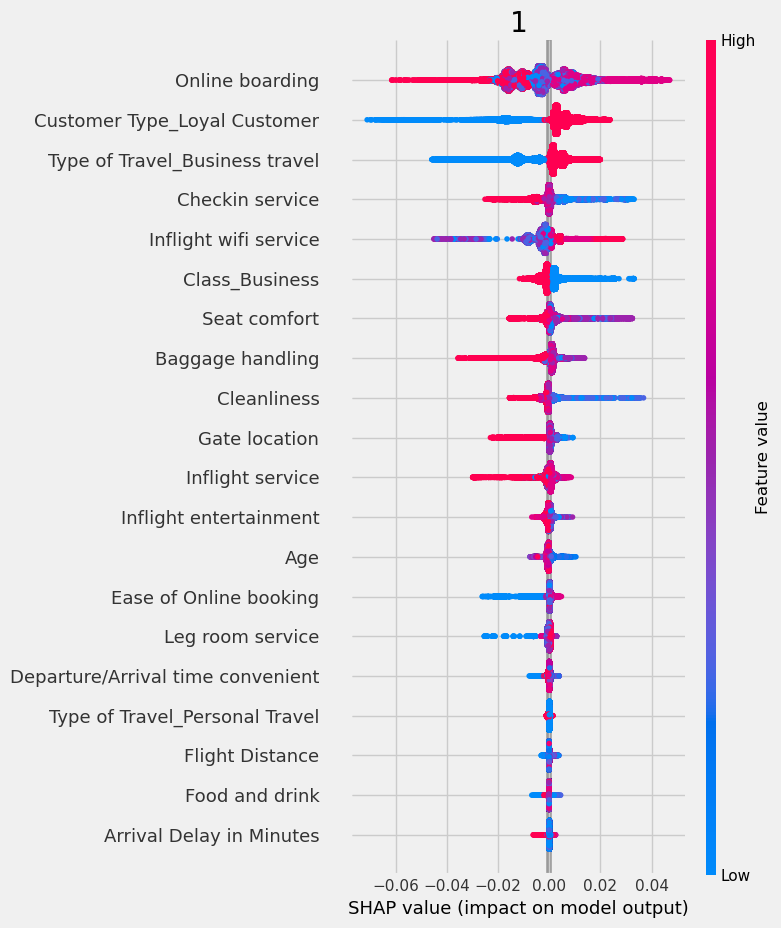

In [33]:
# Using SHAP
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)

# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner, features=feature_names)
